This Notebook contains overview of NAB dataset https://www.kaggle.com/boltzmannbrain/nab.
But data from this notebook was downloaded from dataset's github repository as it bigger and also contains labels for anomalies.
https://github.com/numenta/NAB

In [1]:
# libraries
#%matplotlib notebook
import os
import pandas as pd
import numpy as np
import json

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

# 1 Data
## 1.1 Extract data
Extract all the data in one python dictionary

In [2]:
data = {}
path = 'E:/Guanru/AWS_server_mantains/AWS_server_maintains/data/'

def addFolderAndReadAll(f_name):
    data[f_name] = {}
    csvs = os.listdir(path + '/' + f_name)
    csvs_num = 0
    for csv in csvs:
        data[f_name][csv] = pd.read_csv(path + '/' + f_name + '/' + csv)
        csvs_num += 1
    return csvs_num

csvs_num = sum([addFolderAndReadAll(f_name) for f_name in os.listdir(path) if os.path.isdir(path + f_name)])

In [3]:
data['realKnownCause']['rogue_agent_key_updown.csv']

,timestamp,value
0,2014-07-06 20:10:00,1.047256
1,2014-07-06 20:15:00,1.848031
2,2014-07-06 20:20:00,1.297892
3,2014-07-06 20:25:00,1.593151
4,2014-07-06 20:35:00,0.000000
...,...,...
5310,2014-07-25 08:35:00,3.751862
5311,2014-07-25 08:40:00,0.000000
5312,2014-07-25 08:45:00,15.505864
5313,2014-07-25 08:50:00,1.397614


Loading anomaly labels and retrieving corresponding indices in the dataset.

In [4]:
with open('E:/Guanru/AWS_server_mantains/AWS_server_maintains/labels/combined_windows.json', 'r') as file:
    labels = json.load(file)

In [5]:
for key1 in data:
    for key2 in data[key1]:
        one_csv_labels = labels[key1+'/'+key2]
        data[key1][key2]['interval'] = np.array(0)
        num = 0
        for interval in one_csv_labels:
            #print(key2, interval, num)
            index1 = list(data[key1][key2]['timestamp']).index(interval[0][:19])
            index2 = list(data[key1][key2]['timestamp']).index(interval[1][:19])
            data[key1][key2]['interval'][num] = slice(index1, index2)
            num += 1
            

C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
data['realTweets']['Twitter_volume_GOOG.csv']

,timestamp,value,interval
0,2015-02-26 21:42:53,35,"slice(4106, 4743, None)"
1,2015-02-26 21:47:53,41,"slice(6728, 7124, None)"
2,2015-02-26 21:52:53,32,"slice(9399, 9795, None)"
3,2015-02-26 21:57:53,36,0
4,2015-02-26 22:02:53,32,0
...,...,...,...
15837,2015-04-22 21:27:53,58,0
15838,2015-04-22 21:32:53,50,0
15839,2015-04-22 21:37:53,32,0
15840,2015-04-22 21:42:53,72,0


## 1.2 Visualize data and anomalies 

Blue is normal datapoints. Red is anomaly.

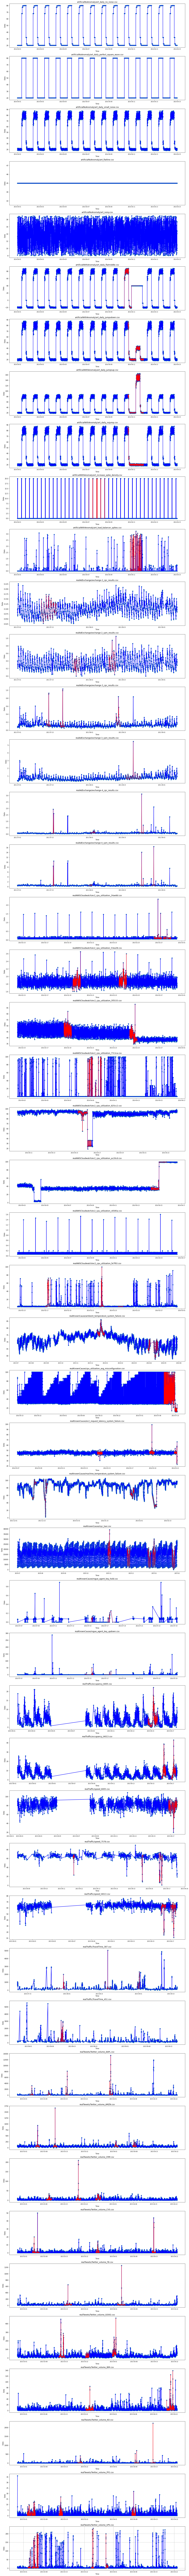

In [7]:
fig = plt.figure(figsize=(20, 300))

num = 0
for key1 in data:
    for key2 in data[key1]:
        num += 1
        y = data[key1][key2]['value']
        x = pd.to_datetime(data[key1][key2]['timestamp'])
        
        ax = fig.add_subplot(csvs_num,1,num)
        
        ax.title.set_text(key1+'/'+key2)
        ax.set_xlabel('Time')
        ax.set_ylabel('Data')
        plt.setp(ax.get_xticklabels(), size=8)
        ax.plot(x, y, 'b-', linewidth=2)
        i = 0
        while data[key1][key2]['interval'][i] != 0:
            bold = data[key1][key2]['interval'][i]
            ax.plot(x[bold], y[bold], 'r-', linewidth=1)
            i += 1
        ax.scatter(x, y)

plt.grid()
plt.show()

#### Scoreboard (from https://github.com/numenta/NAB)

The NAB scores are normalized such that the maximum possible is 100.0 (i.e. the perfect detector), and a baseline of 0.0 is determined by the "null" detector (which makes no detections).

| Detector      | Standard Profile | Reward Low FP | Reward Low FN |
|---------------|------------------|---------------|---------------|
| Perfect       | 100.0            | 100.0         | 100.0         |
| [Numenta HTM](https://github.com/numenta/nupic)* | 70.5-69.7     | 62.6-61.7     | 75.2-74.2     |
| [CAD OSE](https://github.com/smirmik/CAD)&dagger; | 69.9          | 67.0          | 73.2          |
| [earthgecko Skyline](https://github.com/earthgecko/skyline) | 58.2 | 46.2 | 63.9 |
| [KNN CAD](https://github.com/numenta/NAB/tree/master/nab/detectors/knncad)&dagger; | 58.0     | 43.4  | 64.8     |
| [Relative Entropy](http://www.hpl.hp.com/techreports/2011/HPL-2011-8.pdf) | 54.6 | 47.6 | 58.8 |
| [Random Cut Forest](http://proceedings.mlr.press/v48/guha16.pdf) **** | 51.7 | 38.4 | 59.7 |
| [Twitter ADVec v1.0.0](https://github.com/twitter/AnomalyDetection)| 47.1             | 33.6          | 53.5          |
| [Windowed Gaussian](https://github.com/numenta/NAB/blob/master/nab/detectors/gaussian/windowedGaussian_detector.py) | 39.6             | 20.9         | 47.4          |
| [Etsy Skyline](https://github.com/etsy/skyline) | 35.7             | 27.1          | 44.5          |
| Bayesian Changepoint**          | 17.7              | 3.2           | 32.2           |
|  [EXPoSE](https://arxiv.org/abs/1601.06602v3)   | 16.4     | 3.2  | 26.9     |
| Random***       | 11.0             | 1.2          | 19.5          |
| Null          | 0.0              | 0.0           | 0.0           |